# Autoencoders
### Kyle McLester

In [35]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
from copy import deepcopy as copy

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'   #TF2: to fix Jupyter down

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [36]:
names=["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

abalone_df = pd.read_csv("datasets/abalone.data", names=names)
abalone_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


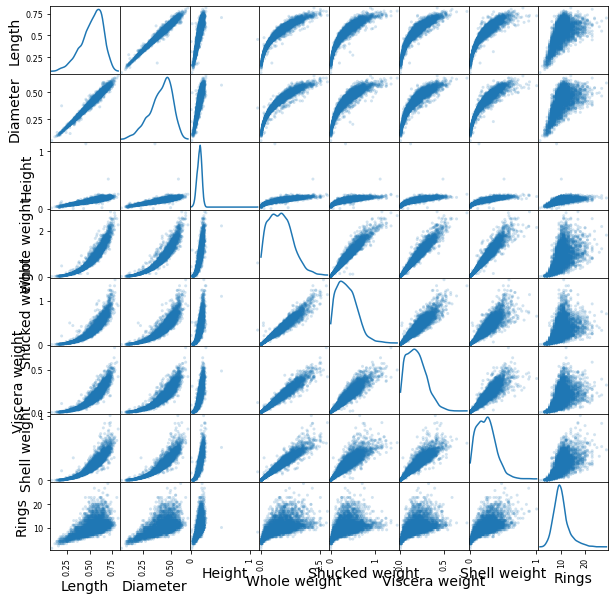

In [37]:
from pandas.plotting import scatter_matrix

scatter_matrix(abalone_df, alpha=0.2, figsize=(10,10), diagonal='kde');

In [38]:
X = abalone_df.iloc[:, 1:].copy()
T = abalone_df[['Sex']].copy()

In [39]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [40]:
T

,Sex
0,M
1,M
2,F
3,M
4,I
...,...
4172,F
4173,M
4174,M
4175,F


In [41]:
Tdic = {'M': 0, 'F':1, 'I':2 }

Tl = T['Sex'].apply(lambda x: Tdic[x]) 
Tl

0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [42]:
import partitionlib as ptl
# just in case, you made change in the file, you may need to reload as below
import importlib
import partitionlib
importlib.reload(partitionlib);

In [43]:
def partition_data(X, T):
    """Partition data into train and test splits."""
    data, targets = ptl.partition(copy(X.values), copy(T.values))
    Xtrain, Xtest = data
    Ttrain, Ttest = targets
    
    return Xtrain, Xtest, Ttrain, Ttest

In [44]:
Xtrain, Xtest, Ttrain, Ttest = partition_data(X, Tl)
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (3342, 8)
Train target shape: (3342, 1)
Test data shape: (835, 8)
Test target shape: (835, 1)


In [45]:
N, D = X.shape
Ntrain, Ntest = Xtrain.shape[0], Xtest.shape[0]
print("Number of total samples: {}".format(N))
print("Number of total features: {}".format(D))
print("Number of training samples: {}".format(Ntrain))
print("Number of testing samples: {}".format(Ntest))

Number of total samples: 4177
Number of total features: 8
Number of training samples: 3342
Number of testing samples: 835


In [46]:
def standardize(X, mean, std):
    return (X-mean) / std

In [47]:
mean = np.mean(Xtrain, axis=0)
std = np.std(Xtrain, axis=0)

XtrainS = standardize(Xtrain, mean, std)
XtestS = standardize(Xtest, mean, std)

In [48]:
pd.DataFrame(XtrainS).describe()

,0,1,2,3,4,5,6,7
count,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,-8.568915e-15,-1.427105e-14,7.713558e-15,1.073348e-16,-2.924650e-15,-7.269602e-16,4.031950e-15,1.616002e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-3.753701e+00,-3.568263e+00,-3.317290e+00,-1.697289e+00,-1.626730e+00,-1.654099e+00,-1.714434e+00,-2.766411e+00
25%,-5.819688e-01,-5.903106e-01,-5.844002e-01,-7.837842e-01,-7.756057e-01,-7.880840e-01,-7.768769e-01,-5.986137e-01
50%,1.692310e-01,1.667960e-01,9.706228e-03,-6.003857e-02,-1.073487e-01,-9.618826e-02,-3.565765e-02,-1.340858e-01
75%,7.534975e-01,7.220076e-01,6.038127e-01,6.647301e-01,6.466981e-01,6.690209e-01,6.524243e-01,3.304422e-01
max,2.422830e+00,2.438116e+00,2.353632e+01,3.985265e+00,4.468857e+00,5.306097e+00,5.515831e+00,5.904778e+00


In [49]:
tf.keras.backend.set_floatx('float64')

In [50]:
n_hidden1 = 6
n_hidden2 = 3 
n_hidden3 = n_hidden1
n_outputs = D

encoder = keras.Sequential([
            keras.layers.Input(shape=(D,)),
            keras.layers.Dense(n_hidden1, activation='tanh'),
            keras.layers.Dense(n_hidden2, activation='tanh'),
        ])
# Label our encoder model for Keras
encoder._name = 'encoder'

decoder = keras.Sequential([
            keras.layers.Input(shape=(n_hidden2,)),
            keras.layers.Dense(n_hidden3, activation='tanh'),
            keras.layers.Dense(n_outputs),
        ])
# Label our decoder model for Keras
decoder._name = 'decoder'

In [51]:
# Combine both encoder and decoder models into an autoencoder
autoencoder = keras.models.Sequential([keras.layers.Input(shape=(D,)), encoder, decoder], name='autoencoder')
# Compile our autoencoder with adam loss and mse loss
autoencoder.compile(optimizer='adam', loss='mse')

In [52]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 21        
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [53]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 56        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [54]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Sequential)         (None, 3)                 75        
_________________________________________________________________
decoder (Sequential)         (None, 8)                 80        
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = autoencoder.fit(Xtrain, Xtrain, epochs=20)

Epoch 1/20
105/105 [==============================] - 0s 414us/step - loss: 14.4994
Epoch 2/20
105/105 [==============================] - 0s 385us/step - loss: 11.3363
Epoch 3/20
105/105 [==============================] - 0s 395us/step - loss: 9.2879
Epoch 4/20
105/105 [==============================] - 0s 395us/step - loss: 7.1300
Epoch 5/20
105/105 [==============================] - 0s 414us/step - loss: 5.4739
Epoch 6/20
105/105 [==============================] - 0s 404us/step - loss: 4.1499
Epoch 7/20
105/105 [==============================] - 0s 395us/step - loss: 3.5792
Epoch 8/20
105/105 [==============================] - 0s 404us/step - loss: 2.7468
Epoch 9/20
105/105 [==============================] - 0s 395us/step - loss: 2.2930
Epoch 10/20
105/105 [==============================] - 0s 404us/step - loss: 1.9285
Epoch 11/20
105/105 [==============================] - 0s 404us/step - loss: 1.7488
Epoch 12/20
105/105 [==============================] - 0s 396us/step - loss: 1.5675

In [56]:
colors = ['red', 'yellow', 'blue']

def plot_codings2d(encodings, ys, use_labels=None, N=500):
    """
        Plots vector representations in 2D space.
        
        Args:
            encodings (numpy.ndarray): encoding for that correspond 
                to provided labels ys.
                
            ys (numpy.ndarray): Labels for each vector encoding
            
            use_labels (list): List of labels to be plotted.
            
            N (int): Number of samples to plot.
    """

    plt.figure(figsize=(6,6))
    plt.xlim([encodings[:, 0].min(),encodings[:, 0].max()])
    plt.ylim([encodings[:, 1].min(),encodings[:, 1].max()])
    
    unique_labels = np.unique(ys)
    for i, label in enumerate(ys[:N, 0]):
        if use_labels is None or label in use_labels:
            idx = np.where(unique_labels == label)[0][0]
            plt.annotate(label, (encodings[i, 0], encodings[i, 1]), color=colors[idx])

In [57]:
from mpl_toolkits.mplot3d import Axes3D

def plot_codings3d(encodings, ys, use_labels=None, N=500):
    """
        Plots vector representations in 3D space.
        
        Args:
            encodings (numpy.ndarray): encoding for that correspond 
                to provided labels ys.
                
            ys (numpy.ndarray): Labels for each vector encoding
            
            use_labels (list): List of labels to be plotted.
            
            N (int): Number of samples to plot.
    """

    fig = plt.figure()
    ax = fig.gca(projection='3d')

    unique_labels = np.unique(ys)
    for i, label in enumerate(ys[:N, 0]):
        if use_labels is None or txt in use_labels:
            idx = np.where(unique_labels == label)[0][0]
            x, y, z = encodings[i, :]
            ax.text(x, y, z, label, color=colors[idx])


Compressed output vector of encoder: (835, 3)


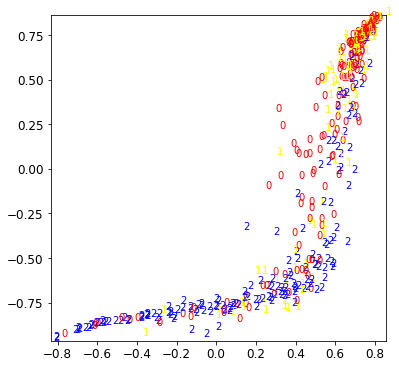

In [58]:
test_enc = encoder(XtestS)
print("Compressed output vector of encoder: {}".format(test_enc.shape))
plot_codings2d(test_enc.numpy(), Ttest)

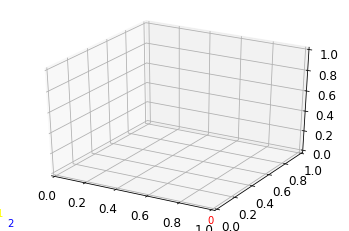

In [59]:
plot_codings3d(test_enc.numpy(), Ttest)

In [60]:
n_hidden1 = 50
n_hidden2 = 3
n_hidden3 = n_hidden1
n_outputs = D

encoder = keras.Sequential([
            keras.layers.Input(shape=(D,)),
            keras.layers.Dense(n_hidden1, activation='tanh'), #, kernel_initializer='he_normal'),
            keras.layers.Dense(n_hidden2, activation='tanh'), #, kernel_initializer='he_normal')
        ], name='encoder')
# Label our encoder model for Keras
encoder._name = 'encoder'

decoder = keras.Sequential([
            keras.layers.Input(shape=(n_hidden2,)),
            keras.layers.Dense(n_hidden3, activation='tanh'), #, kernel_initializer='he_normal'),
            keras.layers.Dense(n_outputs) #, kernel_initializer='he_normal')
        ])
# Label our decoder model for Keras
decoder._name = 'decoder'

In [61]:
# Combine both encoder and decoder models into an autoencoder
autoencoder = keras.models.Sequential([keras.layers.Input(shape=(D,)), encoder, decoder], name='autoencoder')
# Compile our autoencoder with adam loss and mse loss
autoencoder.compile(optimizer='adam', loss='mse')

In [62]:
history = autoencoder.fit(Xtrain, Xtrain, epochs=20)

Epoch 1/20
105/105 [==============================] - 0s 434us/step - loss: 10.7097
Epoch 2/20
105/105 [==============================] - 0s 434us/step - loss: 2.8957
Epoch 3/20
105/105 [==============================] - 0s 478us/step - loss: 1.3620
Epoch 4/20
105/105 [==============================] - 0s 434us/step - loss: 0.5579
Epoch 5/20
105/105 [==============================] - 0s 483us/step - loss: 0.2734
Epoch 6/20
105/105 [==============================] - 0s 482us/step - loss: 0.1625
Epoch 7/20
105/105 [==============================] - 0s 478us/step - loss: 0.1581
Epoch 8/20
105/105 [==============================] - 0s 434us/step - loss: 0.1068
Epoch 9/20
105/105 [==============================] - 0s 434us/step - loss: 0.0886
Epoch 10/20
105/105 [==============================] - 0s 476us/step - loss: 0.0874
Epoch 11/20
105/105 [==============================] - 0s 452us/step - loss: 0.0640
Epoch 12/20
105/105 [==============================] - 0s 462us/step - loss: 0.0491


Compressed output vector of encoder: (835, 3)


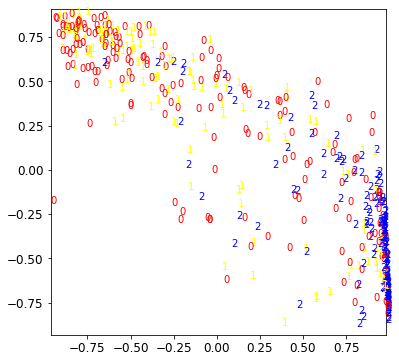

In [63]:
test_enc = encoder(XtestS)
print("Compressed output vector of encoder: {}".format(test_enc.shape))
plot_codings2d(test_enc.numpy(), Ttest)

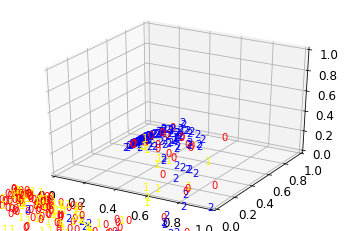

In [64]:
plot_codings3d(test_enc.numpy(), Ttest)

In [65]:
classifier = keras.Sequential([
            keras.layers.Input(shape=(3,)),
            keras.layers.Dense(n_hidden1, activation='tanh'),
            keras.layers.Dense(3, activation='softmax')
        ])

In [66]:
model = keras.models.Sequential([keras.layers.Input(shape=(D,)), encoder, classifier])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [ ]:
history = model.fit(XtrainS, Ttrain, epochs=20, validation_data=[XtestS, Ttest])

In [ ]:
def plot_result(Y, T, title=None):
    """
        Plots predicted and true labels.
        
        Args:
            Y (numpy.ndarray): Predicted labels
            
            T (numpy.ndarray): True labels
            
            title (str): Title for the plot
    """
    if len(T.shape) > 1:
        T = T.squeeze()
    # plot in sorted order
    sorted_i = np.argsort(T)

    plt.figure(figsize=[5,5])
    plt.plot(Y[sorted_i], 'b.', label="prediction")
    plt.plot(T[sorted_i], 'r-', label="target")
    plt.legend()
    plt.ylabel("Rings")
    plt.xlabel("Samples")
    plt.ylim([-1,4])
    plt.title(title)
    
    # accuracy
    print("Acc: {} %".format(100 * np.sum(Y==T)/T.shape[0]))

Acc: 52.93413173652694 %


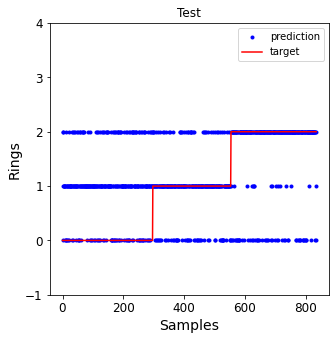

In [68]:
Ytest_probs = model.predict(XtestS)

Ytest = np.argmax(Ytest_probs, axis=1)

plot_result(Ytest, Ttest, title="Test")